# Analysis of Gut Microbiota data from ASD and typically developing individuals

---

In [2]:
import pandas as pd 
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker

dfGut = pd.read_excel("/home/brenoslivio/Documents/git/GutMicrobiomeASDAnalysis/data/ZHOU_DAN_2020/16S_Sequencing/GSE113690_Autism_16S_rRNA_OTU_assignment_and_abundance.xls")

dfGut

,OTU,taxonomy,A1,A10,A100,A101,A102,A104,A105,A106,...,B52,B54,B55,B56,B57,B58,B59,B6,B60,B61
0,OTU1,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,OTU2,d__Bacteria;_k__norank;_p__Proteobacteria;_c__...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,OTU3,d__Bacteria;_k__norank;_p__Firmicutes;_c__Erys...,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,OTU4,d__Bacteria;_k__norank;_p__Firmicutes;_c__Baci...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,OTU5,d__Bacteria;_k__norank;_p__Tenericutes;_c__Mol...,0,0,1,0,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,OTU1334,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1318,OTU1335,d__Bacteria;_k__norank;_p__Actinobacteria;_c__...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1319,OTU1336,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1320,OTU1337,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dfGut['taxonomy']

0       d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...
1       d__Bacteria;_k__norank;_p__Proteobacteria;_c__...
2       d__Bacteria;_k__norank;_p__Firmicutes;_c__Erys...
3       d__Bacteria;_k__norank;_p__Firmicutes;_c__Baci...
4       d__Bacteria;_k__norank;_p__Tenericutes;_c__Mol...
                              ...                        
1317    d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...
1318    d__Bacteria;_k__norank;_p__Actinobacteria;_c__...
1319    d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...
1320    d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...
1321    d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...
Name: taxonomy, Length: 1322, dtype: object

In [4]:
s = dfGut['taxonomy'].str.split(r";", n=-1,expand=True)

dfTax = pd.concat([dfGut['OTU'], s], axis=1, ignore_index=True)

dfTax

,0,1,2,3,4,5,6,7,8
0,OTU1,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Defluviitaleaceae,_g__Defluviitaleaceae_UCG-011,_s__Lachnospiraceae_bacterium_feline_oral_taxo...
1,OTU2,d__Bacteria,_k__norank,_p__Proteobacteria,_c__Alphaproteobacteria,_o__Sphingomonadales,_f__Sphingomonadaceae,_g__Sphingopyxis,_s__Sphingopyxis_granuli
2,OTU3,d__Bacteria,_k__norank,_p__Firmicutes,_c__Erysipelotrichia,_o__Erysipelotrichales,_f__Erysipelotrichaceae,_g__Faecalicoccus,_s__unclassified_g__Faecalicoccus
3,OTU4,d__Bacteria,_k__norank,_p__Firmicutes,_c__Bacilli,_o__Lactobacillales,_f__Streptococcaceae,_g__Streptococcus,_s__Streptococcus_anginosus_subsp._anginosus
4,OTU5,d__Bacteria,_k__norank,_p__Tenericutes,_c__Mollicutes,_o__Mollicutes_RF9,_f__norank_o__Mollicutes_RF9,_g__norank_o__Mollicutes_RF9,_s__uncultured_bacterium_g__norank_o__Mollicut...
...,...,...,...,...,...,...,...,...,...
1317,OTU1334,d__Bacteria,_k__norank,_p__Bacteroidetes,_c__Bacteroidia,_o__Bacteroidales,_f__Bacteroidaceae,_g__Bacteroides,_s__unclassified_g__Bacteroides
1318,OTU1335,d__Bacteria,_k__norank,_p__Actinobacteria,_c__Actinobacteria,_o__Coriobacteriales,_f__Coriobacteriaceae,_g__Parvibacter,_s__uncultured_bacterium_g__Parvibacter
1319,OTU1336,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__Ruminococcaceae_UCG-009,_s__uncultured_bacterium_g__Ruminococcaceae_UC...
1320,OTU1337,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Lachnospiraceae,_g__Catonella,_s__unclassified_g__Catonella


In [5]:
colNames = dfGut.iloc[:, 2:].columns

dfGutGroups = pd.concat([dfTax, dfGut.iloc[:, 2:]], axis=1, ignore_index=True)

cols = ['OTU', 'Domain', 'Kingdom', 'Phylium', 'Class', 'Order', 'Family', 'Genus', 'Species']
dfGutGroups.columns = cols + list(colNames)

dfGutGroups

,OTU,Domain,Kingdom,Phylium,Class,Order,Family,Genus,Species,A1,...,B52,B54,B55,B56,B57,B58,B59,B6,B60,B61
0,OTU1,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Defluviitaleaceae,_g__Defluviitaleaceae_UCG-011,_s__Lachnospiraceae_bacterium_feline_oral_taxo...,0,...,0,0,0,0,0,0,0,0,0,0
1,OTU2,d__Bacteria,_k__norank,_p__Proteobacteria,_c__Alphaproteobacteria,_o__Sphingomonadales,_f__Sphingomonadaceae,_g__Sphingopyxis,_s__Sphingopyxis_granuli,0,...,0,0,0,0,0,0,0,0,0,0
2,OTU3,d__Bacteria,_k__norank,_p__Firmicutes,_c__Erysipelotrichia,_o__Erysipelotrichales,_f__Erysipelotrichaceae,_g__Faecalicoccus,_s__unclassified_g__Faecalicoccus,0,...,0,0,0,0,0,0,0,0,0,0
3,OTU4,d__Bacteria,_k__norank,_p__Firmicutes,_c__Bacilli,_o__Lactobacillales,_f__Streptococcaceae,_g__Streptococcus,_s__Streptococcus_anginosus_subsp._anginosus,0,...,0,0,0,0,0,0,0,0,1,0
4,OTU5,d__Bacteria,_k__norank,_p__Tenericutes,_c__Mollicutes,_o__Mollicutes_RF9,_f__norank_o__Mollicutes_RF9,_g__norank_o__Mollicutes_RF9,_s__uncultured_bacterium_g__norank_o__Mollicut...,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,OTU1334,d__Bacteria,_k__norank,_p__Bacteroidetes,_c__Bacteroidia,_o__Bacteroidales,_f__Bacteroidaceae,_g__Bacteroides,_s__unclassified_g__Bacteroides,0,...,0,0,0,0,0,0,0,0,0,0
1318,OTU1335,d__Bacteria,_k__norank,_p__Actinobacteria,_c__Actinobacteria,_o__Coriobacteriales,_f__Coriobacteriaceae,_g__Parvibacter,_s__uncultured_bacterium_g__Parvibacter,0,...,0,0,0,0,0,0,0,0,0,0
1319,OTU1336,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__Ruminococcaceae_UCG-009,_s__uncultured_bacterium_g__Ruminococcaceae_UC...,0,...,0,0,0,0,0,0,0,0,0,0
1320,OTU1337,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Lachnospiraceae,_g__Catonella,_s__unclassified_g__Catonella,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
dfGutGroups['Phylium'].unique()

array(['_p__Firmicutes', '_p__Proteobacteria', '_p__Tenericutes',
       '_p__Bacteroidetes', '_p__Actinobacteria', '_p__Gemmatimonadetes',
       '_p__Deinococcus-Thermus', '_p__Verrucomicrobia',
       '_p__Lentisphaerae', '_p__unclassified_k__norank',
       '_p__Fusobacteria', '_p__Ignavibacteriae', '_p__Spirochaetae',
       '_p__Chloroflexi', '_p__Saccharibacteria', '_p__Deferribacteres',
       '_p__Synergistetes', '_p__Cyanobacteria',
       '_p__SR1__Absconditabacteria_'], dtype=object)

In [26]:
dfPhylium = dfGutGroups.groupby('Phylium').mean()

dfPhylium

,A1,A10,A100,A101,A102,A104,A105,A106,A108,A109,...,B52,B54,B55,B56,B57,B58,B59,B6,B60,B61
Phylium,,,,,,,,,,,,,,,,,,,,,
_p__Actinobacteria,0.923077,36.846154,0.800000,1.446154,2.523077,3.123077,0.446154,0.630769,0.800000,0.569231,...,1.200000,6.953846,0.584615,2.292308,4.030769,1.830769,24.307692,0.692308,0.630769,1.138462
_p__Bacteroidetes,44.916335,55.290837,57.362550,62.322709,71.418327,32.804781,67.920319,80.988048,66.884462,73.661355,...,66.697211,45.243028,64.438247,86.470120,80.613546,60.318725,73.067729,52.597610,59.764940,75.832669
_p__Chloroflexi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
_p__Cyanobacteria,0.000000,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
_p__Deferribacteres,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
_p__Deinococcus-Thermus,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
_p__Firmicutes,17.206135,17.528834,19.466258,18.330061,15.557055,21.072393,17.023313,13.073620,16.530061,15.570552,...,13.825767,21.817178,15.261350,10.532515,12.628221,15.533742,5.726380,21.555828,16.057669,14.494479
_p__Fusobacteria,6.166667,0.166667,16.666667,1.333333,4.666667,2.166667,0.500000,8.166667,2.666667,0.333333,...,0.833333,2.500000,140.833333,4.666667,0.500000,1.666667,0.000000,0.666667,0.166667,1.166667
_p__Gemmatimonadetes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [148]:
dfClass = dfGutGroups.groupby('Class').mean()

dfClass

,A1,A10,A100,A101,A102,A104,A105,A106,A108,A109,...,B52,B54,B55,B56,B57,B58,B59,B6,B60,B61
Class,,,,,,,,,,,,,,,,,,,,,
_c__Actinobacteria,0.923077,36.846154,0.800000,1.446154,2.523077,3.123077,0.446154,0.630769,0.800000,0.569231,...,1.200000,6.953846,0.584615,2.292308,4.030769,1.830769,24.307692,0.692308,0.630769,1.138462
_c__Alphaproteobacteria,2.851852,0.000000,0.037037,0.037037,0.037037,0.037037,0.037037,0.000000,0.037037,0.185185,...,0.000000,0.111111,0.074074,0.000000,0.000000,0.111111,0.037037,0.074074,0.074074,0.037037
_c__Bacilli,0.974359,3.487179,1.897436,1.641026,3.846154,2.641026,2.051282,2.025641,9.205128,1.435897,...,0.589744,2.538462,0.846154,0.282051,1.128205,1.153846,0.487179,1.282051,2.846154,1.538462
_c__Bacteroidia,48.386266,59.562232,61.789700,67.137339,76.935622,35.339056,73.163090,87.244635,72.047210,79.351931,...,71.849785,48.738197,69.416309,93.150215,86.841202,64.978541,78.708155,56.652361,64.381974,81.690987
_c__Betaproteobacteria,5.696970,16.060606,19.575758,23.606061,16.212121,6.545455,15.333333,6.242424,34.363636,9.484848,...,33.393939,46.242424,42.030303,25.969697,10.606061,27.969697,1.909091,6.242424,8.848485,9.454545
_c__Clostridia,19.098266,15.033237,19.828035,19.835260,14.072254,23.341040,18.255780,14.091040,18.098266,16.605491,...,9.007225,20.190751,15.056358,11.395954,5.985549,14.929191,6.122832,24.203757,14.326590,15.114162
_c__Cyanobacteria,0.000000,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
_c__Deferribacteres,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
_c__Deinococci,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000


 higher Firmicutes (P < 0.05), Proteobacteria (P < 0.001), and Actinobacteria (P < 0.001) than that in healthy controls. However, Bacteroidetes were significantly decreased in ASD patients (P < 0.001).

In [149]:
colPhylium = list(dfPhylium.columns)
colsTD = []
colsASD = []

for i in colPhylium:
    if re.search("^A", i):
        colsTD.append(i)

for i in colPhylium:
    if re.search("^B", i):
        colsASD.append(i)

meanASDPhylium = dfPhylium.loc[:,colsASD].mean(axis=1)
meanTDPhylium = dfPhylium.loc[:,colsTD].mean(axis=1)

propASD = meanASDPhylium / (meanASDPhylium + meanTDPhylium)

propASD

Phylium
_p__Actinobacteria              0.742308
_p__Bacteroidetes               0.464750
_p__Chloroflexi                 0.562992
_p__Cyanobacteria               0.827484
_p__Deferribacteres             0.000000
_p__Deinococcus-Thermus         0.201498
_p__Firmicutes                  0.519348
_p__Fusobacteria                0.801745
_p__Gemmatimonadetes            0.000000
_p__Ignavibacteriae             0.000000
_p__Lentisphaerae               0.491409
_p__Proteobacteria              0.547004
_p__SR1__Absconditabacteria_    0.763074
_p__Saccharibacteria            0.505378
_p__Spirochaetae                0.000000
_p__Synergistetes               0.403166
_p__Tenericutes                 0.680440
_p__Verrucomicrobia             0.613577
_p__unclassified_k__norank      0.075139
dtype: float64

In [150]:
colClass = list(dfClass.columns)
colsTD = []
colsASD = []

for i in colClass:
    if re.search("^A", i):
        colsTD.append(i)

for i in colClass:
    if re.search("^B", i):
        colsASD.append(i)

meanASDClass = dfClass.loc[:,colsASD].mean(axis=1)
meanTDClass = dfClass.loc[:,colsTD].mean(axis=1)

propASD2 = meanASDClass / (meanASDClass + meanTDClass)

propASD2

Class
_c__Actinobacteria                        0.742308
_c__Alphaproteobacteria                   0.198969
_c__Bacilli                               0.538769
_c__Bacteroidia                           0.464755
_c__Betaproteobacteria                    0.563717
_c__Clostridia                            0.519366
_c__Cyanobacteria                         0.827484
_c__Deferribacteres                       0.000000
_c__Deinococci                            0.201498
_c__Deltaproteobacteria                   0.467551
_c__Epsilonproteobacteria                 0.364099
_c__Erysipelotrichia                      0.534403
_c__Flavobacteriia                        0.456455
_c__Fusobacteriia                         0.801745
_c__Gammaproteobacteria                   0.546209
_c__Gemmatimonadetes                      0.000000
_c__Ignavibacteria                        0.000000
_c__Lentisphaeria                         0.491409
_c__Mollicutes                            0.680440
_c__Negativicutes        

In [156]:
propASD = propASD.append(propASD2)

propASD

_p__Actinobacteria                        0.742308
_p__Bacteroidetes                         0.464750
_p__Chloroflexi                           0.562992
_p__Cyanobacteria                         0.827484
_p__Deferribacteres                       0.000000
_p__Deinococcus-Thermus                   0.201498
_p__Firmicutes                            0.519348
_p__Fusobacteria                          0.801745
_p__Gemmatimonadetes                      0.000000
_p__Ignavibacteriae                       0.000000
_p__Lentisphaerae                         0.491409
_p__Proteobacteria                        0.547004
_p__SR1__Absconditabacteria_              0.763074
_p__Saccharibacteria                      0.505378
_p__Spirochaetae                          0.000000
_p__Synergistetes                         0.403166
_p__Tenericutes                           0.680440
_p__Verrucomicrobia                       0.613577
_p__unclassified_k__norank                0.075139
_c__Actinobacteria             

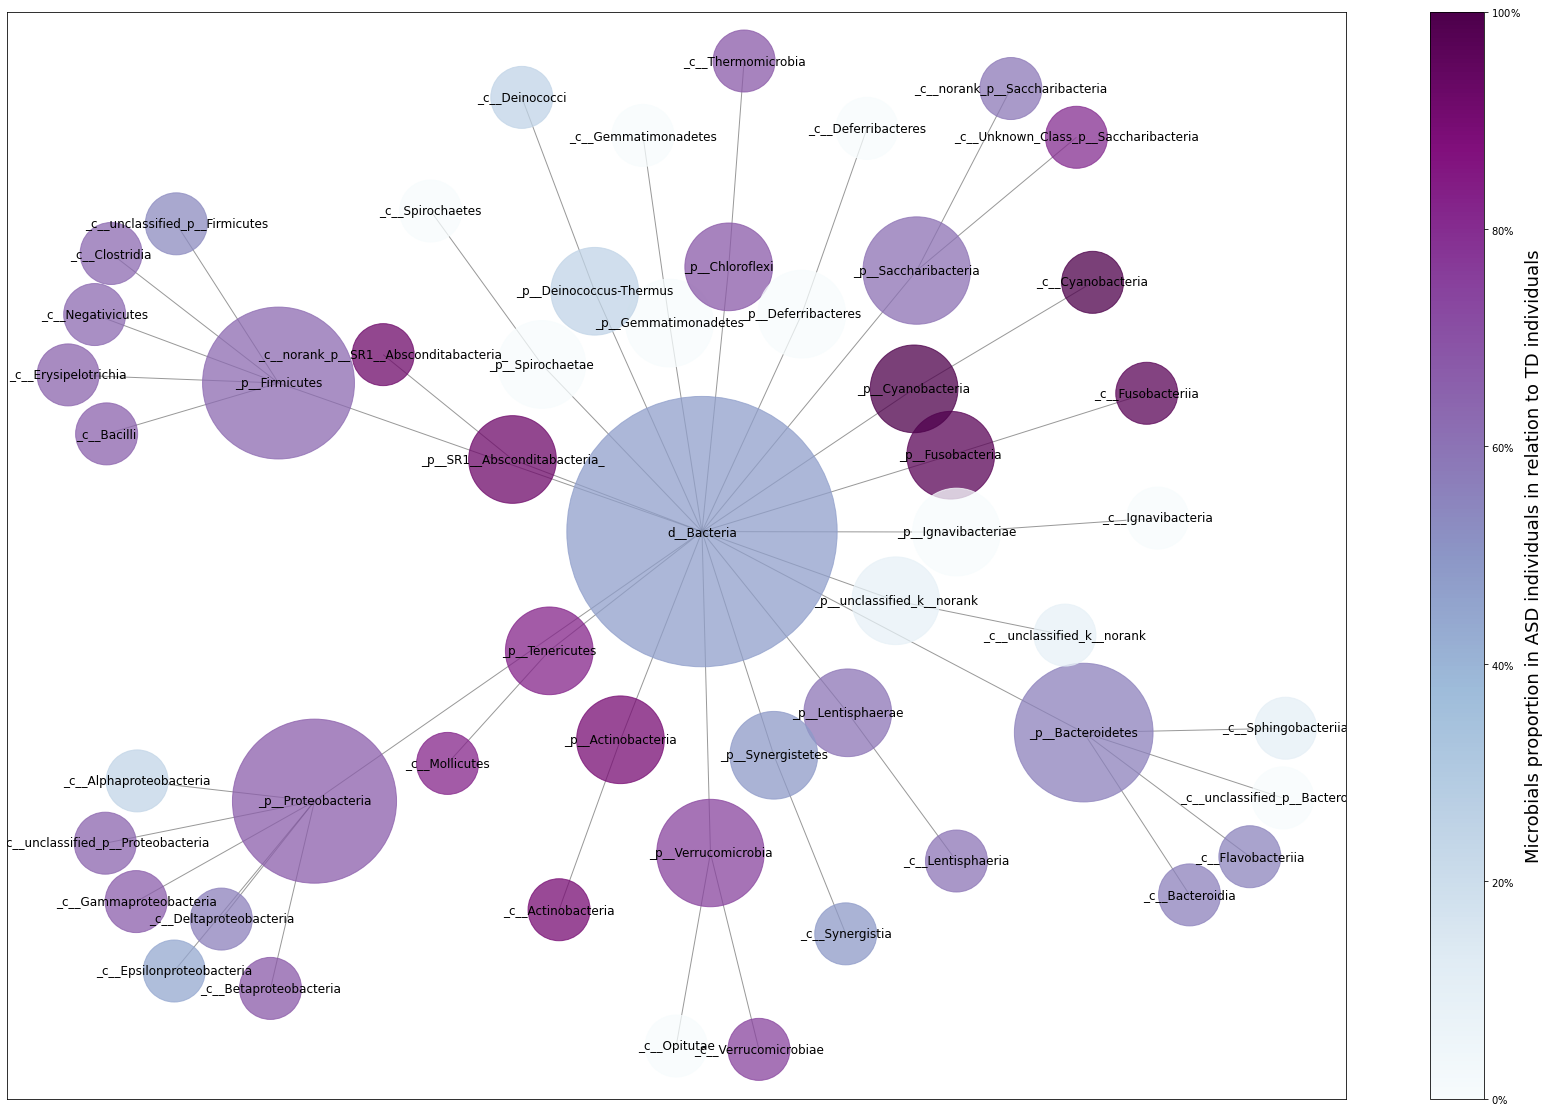

In [159]:
plt.figure(figsize = [30, 20])

G = nx.Graph() 

for i in range(len(s[0])):
   G.add_edge(s[0][i], s[2][i])

for i in range(len(s[2])):
    G.add_edge(s[2][i], s[3][i])

def assignColorPhylium(x):
    if len(propASD[propASD.index == x]) != 0:
        return 256 * (propASD[propASD.index == x][0])
    else:
        return 100

pos = nx.spring_layout(G, seed = 1, k = 0.2, iterations=50)

nx.draw_networkx_labels(G, pos, font_color='k')

cmap = plt.cm.BuPu

nx.draw_networkx_nodes(G, pos, alpha = 0.75, node_shape="o",
                        linewidths = 1,
                        node_color = [round(assignColorPhylium(i)) for i in G.nodes],
                        cmap= cmap,
                        node_size = [nx.degree_centrality(G)[i]*200000 for i in G.nodes])

nx.draw_networkx_edges(G, pos, alpha=0.4)

def fmt(x, pos):
    a = int(x * 100)
    return r'${} \%$'.format(a)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, format = ticker.FuncFormatter(fmt))
cbar.set_label('Microbials proportion in ASD individuals in relation to TD individuals', size = 18)

plt.show()

In [297]:
from networkx.algorithms import community

plt.figure(figsize = [30, 20])

G = nx.Graph() 

#for i in range(len(s[7])):
#    for j in range(len(s[7])): 
#        if s[4][i] == s[4][j]: # if the same phylium
#            G.add_edge(s[7][i], s[7][j])

for i in range(len(s[0])):
   G.add_edge(s[0][i], s[2][i])

for i in range(len(s[2])):
    G.add_edge(s[2][i], s[3][i])

for i in range(len(s[3])):
    G.add_edge(s[3][i], s[4][i])

for i in range(len(s[4])):
    G.add_edge(s[4][i], s[5][i])

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

c = community.girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

pos = nx.spring_layout(G, seed = 1, k = 0.2, iterations=50)

nx.draw(G, pos, edge_color='k',  with_labels=True,font_weight='light', node_size= 280, width= 0.9)

nx.draw_networkx_nodes(G, pos, nodelist= node_groups[0])

nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

TypeError: unhashable type: 'set'

In [236]:
ph = list(set(s[2]))

t = []

for i in range(len(ph)):
    for j in range(len(s[3])):
        if s[2][j] == ph[i]:
            t.append((ph[i], s[3][j]))
set(t)

{('_p__Actinobacteria', '_c__Actinobacteria'),
 ('_p__Bacteroidetes', '_c__Bacteroidia'),
 ('_p__Bacteroidetes', '_c__Flavobacteriia'),
 ('_p__Bacteroidetes', '_c__Sphingobacteriia'),
 ('_p__Bacteroidetes', '_c__unclassified_p__Bacteroidetes'),
 ('_p__Chloroflexi', '_c__Thermomicrobia'),
 ('_p__Cyanobacteria', '_c__Cyanobacteria'),
 ('_p__Deferribacteres', '_c__Deferribacteres'),
 ('_p__Deinococcus-Thermus', '_c__Deinococci'),
 ('_p__Firmicutes', '_c__Bacilli'),
 ('_p__Firmicutes', '_c__Clostridia'),
 ('_p__Firmicutes', '_c__Erysipelotrichia'),
 ('_p__Firmicutes', '_c__Negativicutes'),
 ('_p__Firmicutes', '_c__unclassified_p__Firmicutes'),
 ('_p__Fusobacteria', '_c__Fusobacteriia'),
 ('_p__Gemmatimonadetes', '_c__Gemmatimonadetes'),
 ('_p__Ignavibacteriae', '_c__Ignavibacteria'),
 ('_p__Lentisphaerae', '_c__Lentisphaeria'),
 ('_p__Proteobacteria', '_c__Alphaproteobacteria'),
 ('_p__Proteobacteria', '_c__Betaproteobacteria'),
 ('_p__Proteobacteria', '_c__Deltaproteobacteria'),
 ('_p__Pr

In [320]:
import networkx as nx

G=nx.MultiGraph()
G.add_node('A',role='manager')
G.add_edge('A','B',relation = 'friend')
G.add_edge('A','C', relation = 'business partner')
G.add_edge('A','B', relation = 'classmate')
G.nodes['A']['role'] = 'team member'
G.nodes['B']['role'] = 'engineer'

G.nodes['A']

{'role': 'team member'}

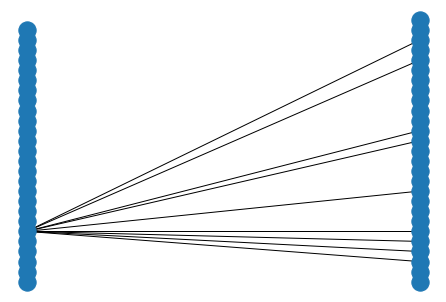

In [272]:
#tuplesB = list(set(t))

# Separate by group
l, r = community.kernighan_lin_bisection(G)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(G, pos=pos)
plt.show()

In [264]:
B.add_edges_from(list(set(t)))
B.nodes(data='True')

NodeDataView({'_p__SR1__Absconditabacteria_': None, '_p__Fusobacteria': None, '_p__Ignavibacteriae': None, '_p__Spirochaetae': None, '_p__Saccharibacteria': None, '_p__Firmicutes': None, '_p__Synergistetes': None, '_p__Tenericutes': None, '_p__Proteobacteria': None, '_p__Verrucomicrobia': None, '_p__Bacteroidetes': None, '_p__Actinobacteria': None, '_p__Gemmatimonadetes': None, '_p__Deferribacteres': None, '_p__Chloroflexi': None, '_p__Cyanobacteria': None, '_p__unclassified_k__norank': None, '_p__Lentisphaerae': None, '_p__Deinococcus-Thermus': None, '_c__Deferribacteres': None, '_c__Betaproteobacteria': None, '_c__Lentisphaeria': None, '_c__Negativicutes': None, '_c__Gammaproteobacteria': None, '_c__Fusobacteriia': None, '_c__unclassified_p__Firmicutes': None, '_c__Bacteroidia': None, '_c__Mollicutes': None, '_c__Cyanobacteria': None, '_c__Thermomicrobia': None, '_c__Sphingobacteriia': None, '_c__Unknown_Class_p__Saccharibacteria': None, '_c__Verrucomicrobiae': None, '_c__Opitutae': 

In [277]:



parts = community.modularity_max._naive_greedy_modularity_communities(G)


list(parts)

[frozenset({'_c__Cyanobacteria',
            '_c__Deferribacteres',
            '_c__Ignavibacteria',
            '_c__Mollicutes',
            '_c__Spirochaetes',
            '_c__Synergistia',
            '_p__Cyanobacteria',
            '_p__Deferribacteres',
            '_p__Ignavibacteriae',
            '_p__Spirochaetae',
            '_p__Synergistetes',
            '_p__Tenericutes',
            'd__Bacteria'}),
 frozenset({'_c__Alphaproteobacteria',
            '_c__Betaproteobacteria',
            '_c__Deltaproteobacteria',
            '_c__Epsilonproteobacteria',
            '_c__Gammaproteobacteria',
            '_c__unclassified_p__Proteobacteria',
            '_p__Proteobacteria'}),
 frozenset({'_c__Bacilli',
            '_c__Clostridia',
            '_c__Erysipelotrichia',
            '_c__Negativicutes',
            '_c__unclassified_p__Firmicutes',
            '_p__Firmicutes'}),
 frozenset({'_c__Bacteroidia',
            '_c__Flavobacteriia',
            '_c__Sphingoba

In [135]:
plt.cm.RdBu(256)

(0.0196078431372549, 0.18823529411764706, 0.3803921568627451, 1.0)

In [115]:
d

array([139.22773604, 132.14198622,  96.50134288, 152.92852362,
        79.11011482, 256.        , 214.06896552, 114.66888637,
       146.28571429, 240.81355932,  61.84986337, 256.        ,
       256.        , 128.        , 142.76923077, 256.        ,
       167.94103194,  54.20037807,  73.14285714])